In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("cleaned_openfoodfacts_dataset.csv", delimiter=";", index_col=0)
df.head(10)

/tmp/ipykernel_17315/2697044346.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cleaned_openfoodfacts_dataset.csv", delimiter=";", index_col=0)


,code,product_name,pnns_groups_2,countries_tags,nutriscore_score,fiber_100g,proteins_100g,energy-kcal_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g
3,00000000000026772226,Skyr,Dairy desserts,en:france,-5.0000,0.565595,10.0,57.0,3.9,0.2,0.10,0.0360
4,0000000000017,Vitória crackers,unknown,en:france,13.9100,3.823884,7.8,375.0,15.0,7.0,3.08,0.5600
12,0000000000123,Sauce Sweety chili 0%,unknown,en:france,8.3900,3.823884,0.2,21.0,0.4,0.0,0.00,0.8160
13,0000000000178,Mini coco,unknown,en:france,3.6500,3.823884,2.0,60.0,3.0,3.0,1.00,0.4600
20,000000000080,Pur jus de pomme,Fruit juices,en:france,9.0000,0.390807,0.2,63.0,15.5,0.0,0.00,0.0000
23,0000000000949,Salade de carottes râpées,One-dish meals,en:france,1.0000,2.135887,0.9,32.0,3.9,0.3,0.10,0.1680
24,0000000000970,Fromage blanc aux myrtilles,unknown,en:france,5.4735,3.823884,4.4,129.0,16.3,4.9,3.10,0.1000
28,0000000001137,Baguette parisien,unknown,en:france,1.2700,3.823884,11.7,222.0,1.8,3.3,2.10,0.2712
30,0000000001151,&quot;Baguette Lyonnais&quot;,unknown,en:france,4.5300,3.823884,12.5,290.0,2.0,9.4,4.50,0.3600
31,0000000001199,Solène céréales poulet,unknown,en:france,-3.0300,2.800000,9.7,219.0,1.7,5.9,0.50,0.1856


## Analyse univariée
Nous choisissons la colonne `nutriscore_score` pour effectuer notre analyse univariée.

In [25]:
nutriscore_score_series = df['nutriscore_score']
mean = nutriscore_score_series.mean()
maximum = nutriscore_score_series.max()
minimum = nutriscore_score_series.min()
median = nutriscore_score_series.median()
q1, q3 = np.percentile(nutriscore_score_series, [25, 75])

print(f"Le nutriscore maximum / le plus mauvais est de : {maximum}.")
print(f"Le nutriscore mini / le meilleur est de : {minimum}.")
print(f"Le nutriscore median des produits vendus en France est de : {median}")
print(f"Le nutriscore moyen des produits vendus en France est de : {mean}")

Le nutriscore maximum / le plus mauvais est de : 40.0.
Le nutriscore mini / le meilleur est de : -15.0.
Le nutriscore median des produits vendus en France est de : 11.0
Le nutriscore moyen des produits vendus en France est de : 10.290159737821272


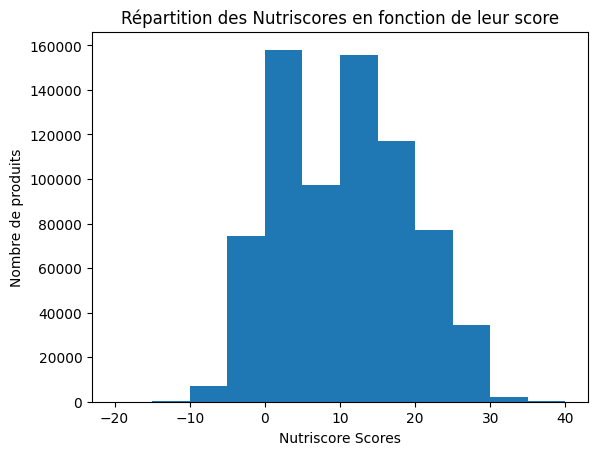

In [18]:
ranges = range(-20, 45, 5)

plt.hist(nutriscore_score_series, bins=ranges)

plt.xlabel("Nutriscore Scores")
plt.ylabel("Nombre de produits")
plt.title("Répartition des Nutriscores en fonction de leur score")

plt.show()

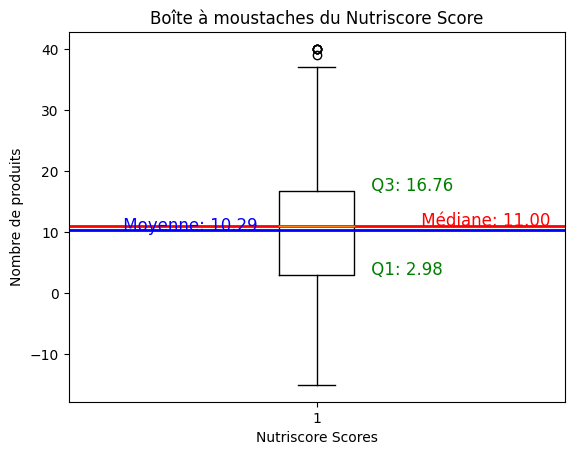

In [51]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.boxplot(nutriscore_score_series)

# Ajout de labels et du titre
ax.set_xlabel("Nutriscore Scores")
ax.set_ylabel("Nombre de produits")
ax.set_title("Boîte à moustaches du Nutriscore Score")

ax.axhline(median, color='r', linestyle='-', linewidth=2)
ax.axhline(mean, color='b', linestyle='-', linewidth=2)

# Ajout des valeurs au graphique
ax.text(1.2, median, " Médiane: {:.2f}".format(median), color='r', fontsize=12)
ax.text(1.1, q1, " Q1: {:.2f}".format(q1), color='g', fontsize=12)
ax.text(1.1, q3, " Q3: {:.2f}".format(q3), color='g', fontsize=12)
ax.text(0.6, mean, " Moyenne: {:.2f}".format(mean), color='b', fontsize=12)




# Affichage de la boîte à moustaches
plt.show()

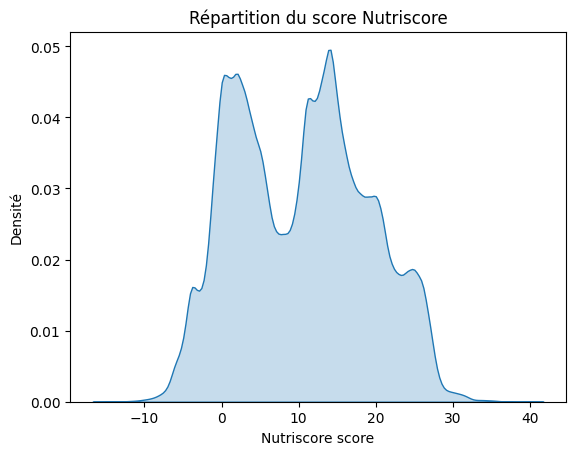

In [53]:
sns.kdeplot(nutriscore_score_series, fill=True)

plt.xlabel("Nutriscore score")
plt.ylabel("Densité")
plt.title("Répartition du score Nutriscore")

# Affichage du graphique de densité
plt.show()

### Analyse bivariée

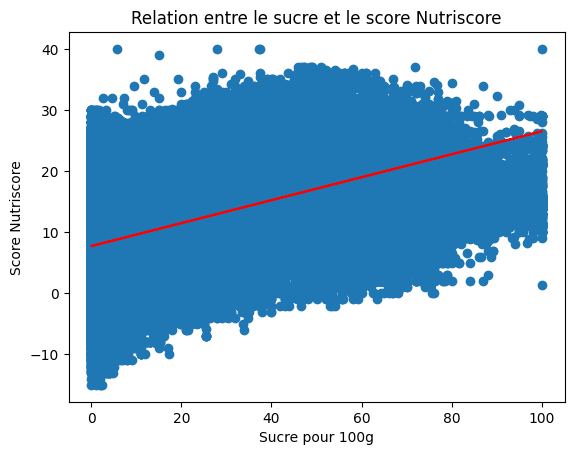

In [56]:
plt.scatter(df['sugars_100g'], df['nutriscore_score'])

plt.xlabel("Sucre pour 100g")
plt.ylabel("Score Nutriscore")
plt.title("Relation entre le sucre et le score Nutriscore")

# Droite de régression
x = df['sugars_100g']
y = df['nutriscore_score']
coefficients = np.polyfit(df['sugars_100g'], df['nutriscore_score'], 1)
pente = coefficients[0]
ordonnee_origine = coefficients[1]
plt.plot(x, pente*x + ordonnee_origine, color='red')

plt.show()